In [1]:
#imports
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import election dataset
election_data = pd.read_csv("election_train.csv")
election_data.head()


,Year,State,County,Office,Party,Votes
0,2018,AZ,Apache County,US Senator,Democratic,16298
1,2018,AZ,Apache County,US Senator,Republican,7810
2,2018,AZ,Cochise County,US Senator,Democratic,17383
3,2018,AZ,Cochise County,US Senator,Republican,26929
4,2018,AZ,Coconino County,US Senator,Democratic,34240


In [3]:
#import demographics dataset
demographic_data = pd.read_csv("demographics_train.csv")
demographic_data.head()

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Wisconsin,La Crosse,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,Virginia,Alleghany,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,Indiana,Fountain,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,Ohio,Geauga,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,Wisconsin,Jackson,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251


### Task 1 - Reshape dataset election_train from long format to wide format.

In [4]:

wide_format_election_data = pd.pivot_table(election_data, index=['Year','State','County', 'Office'], columns=['Party'], values=['Votes'], aggfunc=np.sum).reset_index()
wide_format_election_data.columns = ["Year", "State", "County", "Office", "Democratic Votes", "Republican Votes"]
print(f'Shape of wide Format dataset - f{wide_format_election_data.shape}')
wide_format_election_data.head(10)

Shape of wide Format dataset - f(1205, 6)


,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,AZ,Apache County,US Senator,16298.0,7810.0
1,2018,AZ,Cochise County,US Senator,17383.0,26929.0
2,2018,AZ,Coconino County,US Senator,34240.0,19249.0
3,2018,AZ,Gila County,US Senator,7643.0,12180.0
4,2018,AZ,Graham County,US Senator,3368.0,6870.0
5,2018,AZ,La Paz County,US Senator,1609.0,3265.0
6,2018,AZ,Maricopa County,US Senator,732671.0,672505.0
7,2018,AZ,Mohave County,US Senator,19214.0,50209.0
8,2018,AZ,Navajo County,US Senator,16624.0,18767.0
9,2018,AZ,Pima County,US Senator,221242.0,160550.0


### Task 2 Merge Datasets

In [5]:
# replacing Country with empty/blank string in County name
wide_format_election_data['County'] = wide_format_election_data['County'].str.replace('County', '')
# removing widespaces and converting to uppercase -  County and State
wide_format_election_data[['County', 'State']] = wide_format_election_data[['County', 'State']].apply(lambda x: x.str.strip().str.upper())
wide_format_election_data.head()

,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,AZ,APACHE,US Senator,16298.0,7810.0
1,2018,AZ,COCHISE,US Senator,17383.0,26929.0
2,2018,AZ,COCONINO,US Senator,34240.0,19249.0
3,2018,AZ,GILA,US Senator,7643.0,12180.0
4,2018,AZ,GRAHAM,US Senator,3368.0,6870.0


In [6]:
# states mapping dictionary
states = {'AK': 'ALASKA', 'AL': 'ALABAMA', 'AR': 'ARKANSAS', 'AS': 'AMERICAN SAMOA', 'AZ': 'ARIZONA', 
          'CA': 'CALIFORNIA', 'CO': 'COLORADO', 'CT': 'CONNECTICUT', 'DC': 'DISTRICT OF COLUMBIA', 
          'DE': 'DELAWARE', 'FL': 'FLORIDA', 'GA': 'GEORGIA', 'GU': 'GUAM', 'HI': 'HAWAII', 'IA': 'IOWA', 
          'ID': 'IDAHO', 'IL': 'ILLINOIS', 'IN': 'INDIANA', 'KS': 'KANSAS', 'KY': 'KENTUCKY', 
          'LA': 'LOUISIANA', 'MA': 'MASSACHUSETTS', 'MD': 'MARYLAND', 'ME': 'MAINE', 'MI': 'MICHIGAN',
          'MN': 'MINNESOTA', 'MO': 'MISSOURI', 'MP': 'NORTHERN MARIANA ISLANDS', 'MS': 'MISSISSIPPI',
          'MT': 'MONTANA', 'NA': 'NATIONAL', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'NE': 'NEBRASKA', 
          'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 'NV': 'NEVADA', 'NY': 'NEW YORK', 
          'OH': 'OHIO', 'OK': 'OKLAHOMA', 'OR': 'OREGON', 'PA': 'PENNSYLVANIA', 'PR': 'PUERTO RICO', 
          'RI': 'RHODE ISLAND', 'SC': 'SOUTH CAROLINA', 'SD': 'SOUTH DAKOTA', 'TN': 'TENNESSEE', 
          'TX': 'TEXAS', 'UT': 'UTAH', 'VA': 'VIRGINIA', 'VI': 'VIRGIN ISLANDS', 'VT': 'VERMONT', 
          'WA': 'WASHINGTON', 'WI': 'WISCONSIN', 'WV': 'WEST VIRGINIA', 'WY': 'WYOMING'}
#replacing state codes with state names in State Column
wide_format_election_data = wide_format_election_data.replace({"State":states})
wide_format_election_data.head()

,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,ARIZONA,APACHE,US Senator,16298.0,7810.0
1,2018,ARIZONA,COCHISE,US Senator,17383.0,26929.0
2,2018,ARIZONA,COCONINO,US Senator,34240.0,19249.0
3,2018,ARIZONA,GILA,US Senator,7643.0,12180.0
4,2018,ARIZONA,GRAHAM,US Senator,3368.0,6870.0


In [7]:
# removing widespaces and converting to uppercase -  County and State
demographic_data[['County', 'State']] = demographic_data[['County', 'State']].apply(lambda x: x.str.strip().str.upper())
demographic_data.head()

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,WISCONSIN,LA CROSSE,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,VIRGINIA,ALLEGHANY,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,INDIANA,FOUNTAIN,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,OHIO,GEAUGA,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,WISCONSIN,JACKSON,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251


In [8]:
# Merging datasets using inner join on columns - State and County
merged_data = pd.merge(wide_format_election_data, demographic_data, how='inner', on=['State','County'])
merged_data.head()


,Year,State,County,Office,Democratic Votes,Republican Votes,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,2018,ARIZONA,APACHE,US Senator,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,2018,ARIZONA,COCHISE,US Senator,17383.0,26929.0,4003,128177,92915,56.299492,...,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,2018,ARIZONA,COCONINO,US Senator,34240.0,19249.0,4005,138064,104265,54.619597,...,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,2018,ARIZONA,GILA,US Senator,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,2018,ARIZONA,GRAHAM,US Senator,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


### Task 3 Explore Merged Dataset

In [9]:
print(f'Number of variables - {merged_data.shape[1]}\n')
print(f'Data Types for each variable - \n{merged_data.dtypes}\n')
print(f'Number of variables for each data type - \n{merged_data.dtypes.value_counts()}')

Number of variables - 21

Data Types for each variable - 
Year                                       int64
State                                     object
County                                    object
Office                                    object
Democratic Votes                         float64
Republican Votes                         float64
FIPS                                       int64
Total Population                           int64
Citizen Voting-Age Population              int64
Percent White, not Hispanic or Latino    float64
Percent Black, not Hispanic or Latino    float64
Percent Hispanic or Latino               float64
Percent Foreign Born                     float64
Percent Female                           float64
Percent Age 29 and Under                 float64
Percent Age 65 and Older                 float64
Median Household Income                    int64
Percent Unemployed                       float64
Percent Less than High School Degree     float64
Percent Les

In [10]:
#Looking for columns that have a constant value for all observations
columns_with_single_unique_value  = merged_data.columns[merged_data.nunique() <= 1]
for column in columns_with_single_unique_value:
    print(f'Column {column} unique values - {merged_data[column].unique()}')

Column Year unique values - [2018]
Column Office unique values - ['US Senator']


In [11]:
#Removing the columns 'Year' and 'Office' from the dataset
merged_data = merged_data.drop(columns_with_single_unique_value,axis=1)
merged_data.head()

,State,County,Democratic Votes,Republican Votes,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,ARIZONA,APACHE,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,ARIZONA,COCHISE,17383.0,26929.0,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,ARIZONA,COCONINO,34240.0,19249.0,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,ARIZONA,GILA,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,ARIZONA,GRAHAM,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


### Task 4 Search Missing Values

In [12]:
#Counting Null values for each column
null_count = merged_data.isnull().sum()
null_count = null_count[null_count>0]

#Printing null counts for columns that have null count >0
print(f'Null count for Columns - \n{null_count}\n\n')

#Printing % of null counts for columns that have null count>0
for column, null_co in null_count.iteritems():
    print(f'Percentage of missing values for Column {column} - {null_co*100/merged_data.shape[0]:.2f} %')

Null count for Columns - 
Democratic Votes    3
Republican Votes    2
dtype: int64


Percentage of missing values for Column Democratic Votes - 0.25 %
Percentage of missing values for Column Republican Votes - 0.17 %


In [13]:
merged_data[merged_data.isnull().any(axis=1)][['Democratic Votes', 'Republican Votes', 'Total Population' ]]

,Democratic Votes,Republican Votes,Total Population
425,NaN,49449.0,301707
714,NaN,2694.0,11804
750,2811.0,NaN,32706
865,NaN,632.0,2163
1114,3592.0,NaN,16793


In [14]:
merged_data = merged_data.dropna()

In [15]:
#Counting Null values for each column
null_count = merged_data.isnull().sum()
null_count = null_count[null_count>0]
print(null_count)

Series([], dtype: int64)


In [16]:
#Checking boolean False counts for each column, an empty/blank string or integer 0 will result in a False value
#for boolean type
bool_counts = merged_data.astype(bool).sum(axis=0)
for col, val in bool_counts.iteritems():
    print(f'{col} Percentage Boolean False Counts {(merged_data.shape[0]-val)*100/merged_data.shape[0]:.2f}')

State Percentage Boolean False Counts 0.00
County Percentage Boolean False Counts 0.00
Democratic Votes Percentage Boolean False Counts 0.00
Republican Votes Percentage Boolean False Counts 0.00
FIPS Percentage Boolean False Counts 0.00
Total Population Percentage Boolean False Counts 0.00
Citizen Voting-Age Population Percentage Boolean False Counts 56.49
Percent White, not Hispanic or Latino Percentage Boolean False Counts 0.00
Percent Black, not Hispanic or Latino Percentage Boolean False Counts 3.77
Percent Hispanic or Latino Percentage Boolean False Counts 0.42
Percent Foreign Born Percentage Boolean False Counts 0.25
Percent Female Percentage Boolean False Counts 0.00
Percent Age 29 and Under Percentage Boolean False Counts 0.00
Percent Age 65 and Older Percentage Boolean False Counts 0.00
Median Household Income Percentage Boolean False Counts 0.00
Percent Unemployed Percentage Boolean False Counts 0.25
Percent Less than High School Degree Percentage Boolean False Counts 0.00
Pe

In [17]:
#Removing the column 'Citizen Voting-Age Population' from the dataset
merged_data = merged_data.drop(['Citizen Voting-Age Population'],axis=1)
merged_data.head()

,State,County,Democratic Votes,Republican Votes,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,ARIZONA,APACHE,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,ARIZONA,COCHISE,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,ARIZONA,COCONINO,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,ARIZONA,GILA,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,ARIZONA,GRAHAM,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


### Task 5 : Create a new variable named “Party” that labels each county as Democratic or Republican. This new variable should be equal to 1 if there were more votes cast for the Democratic party than the Republican party in that county and it should be equal to 0 otherwise.

In [18]:
#Confirming that there is no case where # of democratic votes is same as republican votes
count = merged_data[merged_data['Democratic Votes'] == merged_data['Republican Votes']].count()
print ("Count: ", count)

merged_data['Party'] = merged_data.apply(lambda row: 1 if row['Democratic Votes']>row['Republican Votes'] else 0, axis =1)
merged_data.head()




Count:  State                                    0
County                                   0
Democratic Votes                         0
Republican Votes                         0
FIPS                                     0
Total Population                         0
Percent White, not Hispanic or Latino    0
Percent Black, not Hispanic or Latino    0
Percent Hispanic or Latino               0
Percent Foreign Born                     0
Percent Female                           0
Percent Age 29 and Under                 0
Percent Age 65 and Older                 0
Median Household Income                  0
Percent Unemployed                       0
Percent Less than High School Degree     0
Percent Less than Bachelor's Degree      0
Percent Rural                            0
dtype: int64


,State,County,Democratic Votes,Republican Votes,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,ARIZONA,APACHE,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,ARIZONA,COCHISE,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,ARIZONA,COCONINO,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,ARIZONA,GILA,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,ARIZONA,GRAHAM,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0


### Task 6 : Compute the mean median household income for Democratic counties and Republican counties. Which one is higher? Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [19]:
#Mean of household income
democratic_income_mean = merged_data[merged_data['Party'] == 1]['Median Household Income'].mean()
republic_income_mean = merged_data[merged_data['Party'] == 0]['Median Household Income'].mean()
print("Mean Median Household Income for Democratic counties: ", democratic_income_mean)
print("Mean Median Household Income for Republican counties: ", republic_income_mean)

Mean Median Household Income for Democratic counties:  53798.732307692306
Mean Median Household Income for Republican counties:  48746.81954022989


Mean Median Household Income for Democratic counties is greater than Republic counties

In [20]:
#Hypothesis Test

democratic_income_count = merged_data[merged_data['Party'] == 1]['Median Household Income'].count()
republic_income_count = merged_data[merged_data['Party'] == 0]['Median Household Income'].count()

democratic_income_std = merged_data[merged_data['Party'] == 1]['Median Household Income'].std()
republic_income_std = merged_data[merged_data['Party'] == 0]['Median Household Income'].std()
print (democratic_income_count)
print (republic_income_count)
alpha = 0.05

# #null hypothesis : d = r
# #alternative hypothesis : d>r or d<r

t_stats = (democratic_income_mean-republic_income_mean) / ((((democratic_income_std**2)/democratic_income_count) + ((republic_income_std**2)/republic_income_count))**0.5)
print (t_stats)

pvalue = st.t.cdf(t_stats, (democratic_income_count + republic_income_count - 2))
#For two tailed test
pvalue_tail = 2*(1-pvalue)
print(pvalue_tail)

if pvalue_tail < alpha:
    print ("Statistically significant")
else:
    print ("Not sufficient evidence to say not statistically significant")


325
870
5.479141589767387
5.209857278920538e-08
Statistically significant


### Task 7 : Compute the mean population for Democratic counties and Republican counties. Which one is higher? Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [21]:
democratic_population_mean = merged_data[merged_data['Party'] == 1]['Total Population'].mean()
republic_population_mean = merged_data[merged_data['Party'] == 0]['Total Population'].mean()
print("Mean Total Population for Democratic counties: ", democratic_population_mean)
print("Mean Total Population for Republican counties: ", republic_population_mean)

Mean Total Population for Democratic counties:  300998.3169230769
Mean Total Population for Republican counties:  53864.6724137931


Mean Total Population for Democratic counties is greater than Republic counties

In [22]:
#Hypothesis Test

democratic_population_count = merged_data[merged_data['Party'] == 1]['Total Population'].count()
republic_population_count = merged_data[merged_data['Party'] == 0]['Total Population'].count()

democratic_population_std = merged_data[merged_data['Party'] == 1]['Total Population'].std()
republic_population_std = merged_data[merged_data['Party'] == 0]['Total Population'].std()
print (democratic_population_count)
print (republic_population_count)
alpha = 0.05

# #null hypothesis : d = r
# #alternative hypothesis : d>r or d<r

t_stats = (democratic_population_mean-republic_population_mean) / ((((democratic_population_std**2)/democratic_population_count) + ((republic_population_std**2)/republic_population_count))**0.5)
print (t_stats)

pvalue = st.t.cdf(t_stats, (democratic_population_count + republic_population_count - 2))
#For two tailed test
pvalue_tail = 2*(1-pvalue)
print(pvalue_tail)

if pvalue_tail < alpha:
    print ("Statistically significant")
else:
    print ("Not sufficient evidence to say not statistically significant")

325
870
8.004638577960957
2.886579864025407e-15
Statistically significant


<b> Task 8: Compare Democratic counties and Republican counties in terms of age, gender, race and ethnicity, and education by computing descriptive statistics and creating plots to visualize the results. What conclusions do you make for each variable from the descriptive statistics and the plots? </b>

<b>AGE</b>

In [23]:
#AGE
age = merged_data[['Percent Age 29 and Under','Percent Age 65 and Older','Party']]
#found the ages ranges
age['Percent Age between 29 and 65'] = 100 - (age['Percent Age 29 and Under'] + age['Percent Age 65 and Older'])
#(age.style.set_table_styles([{'selector' : '', 'props' : [('border', '2px solid green')]}]) )
abc = (age.groupby('Party').describe())
abc.style

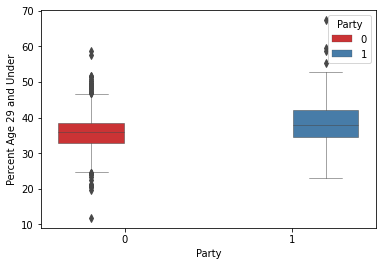

In [24]:
ax = sns.boxplot(x="Party", y="Percent Age 29 and Under", data=age,hue="Party",palette="Set1",linewidth=0.5)

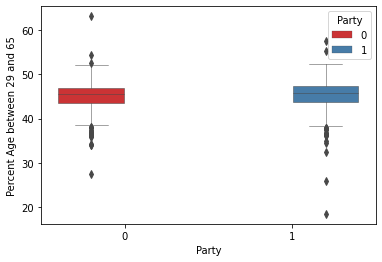

In [25]:
ay = sns.boxplot(x="Party", y="Percent Age between 29 and 65",data=age,hue="Party",palette="Set1",linewidth=0.5)

<b>GENDER</b>

In [26]:
#GENDER
gender = merged_data[['Percent Female','Party']]
#found the male gender percent
gender['Percent Male'] = 100 - gender['Percent Female'] 
(gender.groupby('Party').describe())

Percent Female                                                        \
               count       mean       std        min        25%        50%   
Party                                                                        
0              870.0  49.630898  2.429013  21.513413  49.222905  50.176792   
1              325.0  50.385433  2.149359  34.245291  49.854280  50.653830   

                            Percent Male                                  \
             75%        max        count       mean       std        min   
Party                                                                      
0      50.829770  55.885023        870.0  50.369102  2.429013  44.114977   
1      51.492075  56.418468        325.0  49.614567  2.149359  43.581532   

                                                   
             25%        50%        75%        max  
Party                                              
0      49.170230  49.823208  50.777095  78.486587  
1      48.507925  49.346170  50.145720  65.754709

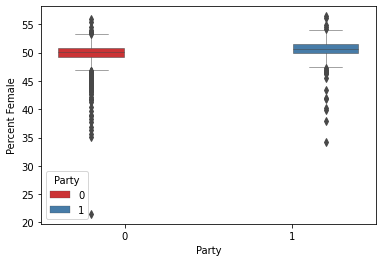

In [27]:
ax = sns.boxplot(x="Party", y="Percent Female", data=gender,hue="Party",palette="Set1",linewidth=0.5)

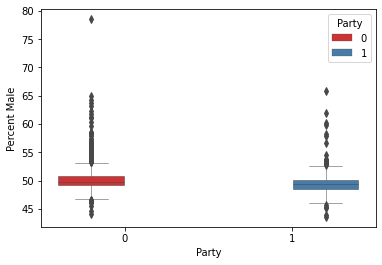

In [28]:
ay = sns.boxplot(x="Party", y="Percent Male",data=gender,hue="Party",palette="Set1",linewidth=0.5)

<b>RACE</b>

In [29]:
#RACE
race = merged_data[['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Party']]
(race.groupby('Party').describe())

Percent White, not Hispanic or Latino                                   \
                                      count       mean        std        min   
Party                                                                          
0                                     870.0  82.656646  16.056122  18.758977   
1                                     325.0  69.683766  24.981502   2.776702   

                                                   \
             25%        50%        75%        max   
Party                                               
0      75.016397  89.434849  94.466596  99.627329   
1      53.271579  77.786090  90.300749  98.063495   

      Percent Black, not Hispanic or Latino            ...             \
                                      count      mean  ...        75%   
Party                                                  ...              
0                                     870.0  4.189241  ...   4.753831   
1                                     325.0  9.242649  ...  11.058843   

                 Percent Hispanic or Latino                                  \
             max                      count       mean        std       min   
Party                                                                         
0      41.563041                      870.0   9.733094  14.049576  0.000000   
1      63.953279                      325.0  12.587391  19.575030  0.193349   

                                                 
            25%       50%        75%        max  
Party                                            
0      1.704539  3.427435  10.709696  78.397012  
1      2.531017  5.039747  11.857116  95.479801  

[2 rows x 24 columns]

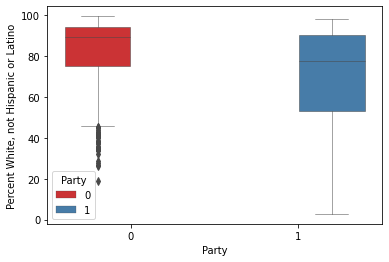

In [30]:
ax = sns.boxplot(x="Party", y="Percent White, not Hispanic or Latino",data=race,hue="Party",palette="Set1",linewidth=0.5)

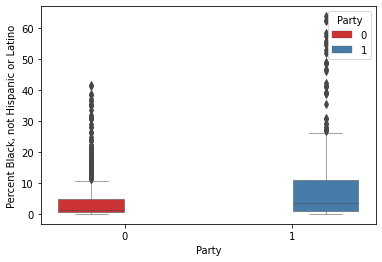

In [31]:
ay = sns.boxplot(x="Party", y="Percent Black, not Hispanic or Latino",data=race,hue="Party",palette="Set1",linewidth=0.5)

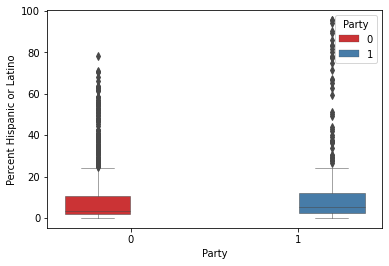

In [32]:
az = sns.boxplot(x="Party", y="Percent Hispanic or Latino",data=race,hue="Party",palette="Set1",linewidth=0.5)

<b>ETHNICITY</b>

In [33]:
#ethnicity
ethnicity = merged_data[['Percent Foreign Born','Party']]
#compute non foreign born
ethnicity['Percent Not Foreign Born'] = 100 - ethnicity['Percent Foreign Born']
ethnicity = ethnicity[['Percent Foreign Born','Percent Not Foreign Born','Party']]
ethnicity.groupby('Party').describe()

Percent Foreign Born                                                    \
                     count      mean       std       min       25%       50%   
Party                                                                          
0                    870.0  3.990096  4.507786  0.000000  1.320101  2.326317   
1                    325.0  7.986330  8.330740  0.179769  2.470508  5.105490   

                            Percent Not Foreign Born                       \
             75%        max                    count       mean       std   
Party                                                                       
0       5.149429  37.058317                    870.0  96.009904  4.507786   
1      10.144555  52.229868                    325.0  92.013670  8.330740   

                                                               
             min        25%        50%        75%         max  
Party                                                          
0      62.941683  94.850571  97.673683  98.679899  100.000000  
1      47.770132  89.855445  94.894510  97.529492   99.820231

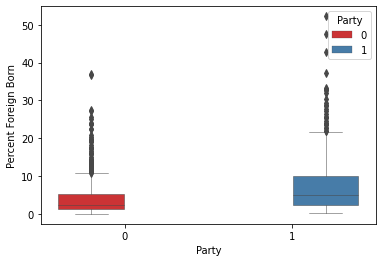

In [34]:
ax = sns.boxplot(x="Party", y="Percent Foreign Born",data=ethnicity,hue="Party",palette="Set1",linewidth=0.5)

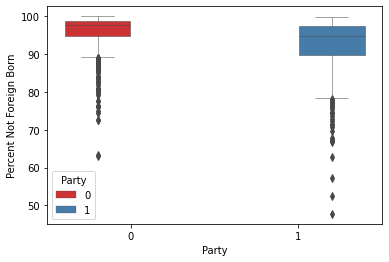

In [35]:
ay = sns.boxplot(x="Party", y="Percent Not Foreign Born",data=ethnicity,hue="Party",palette="Set1",linewidth=0.5)

<b>EDUCATION</b>

In [36]:
#EDUCATION
education = merged_data[['Percent Less than High School Degree',"Percent Less than Bachelor's Degree",'Party']]
education.groupby('Party').describe()

Percent Less than High School Degree                                 \
                                     count       mean       std       min   
Party                                                                       
0                                    870.0  14.009112  6.303126  2.134454   
1                                    325.0  11.883760  6.505613  3.215803   

                                                  \
            25%        50%        75%        max   
Party                                              
0      9.662491  12.572435  17.447168  47.812773   
1      7.893714  10.370080  13.637059  49.673777   

      Percent Less than Bachelor's Degree                                  \
                                    count       mean        std       min   
Party                                                                       
0                                   870.0  81.095427   6.815537  43.41947   
1                                   325.0  71.968225  11.192404  26.33544   

                                                   
             25%        50%        75%        max  
Party                                              
0      78.108424  82.406700  85.546272  97.014925  
1      65.711800  72.736143  79.903653  94.849957

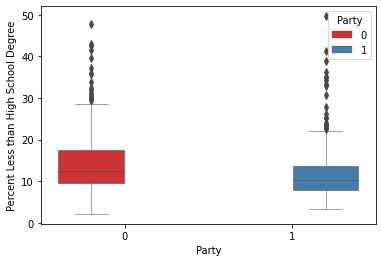

In [37]:
ax = sns.boxplot(x="Party", y="Percent Less than High School Degree",data=education,hue="Party",palette="Set1",linewidth=0.5)

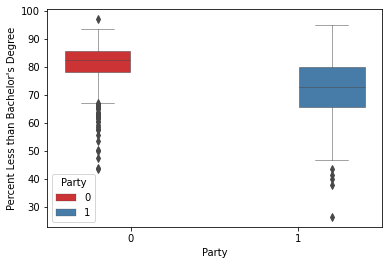

In [38]:
ay = sns.boxplot(x="Party", y="Percent Less than Bachelor's Degree",data=education,hue="Party",palette="Set1",linewidth=0.5)

<b>Task 9:Based on your results for tasks 6-8, which variables in the dataset do you think are more important to determine whether a county is labeled as Democratic or Republican? Justify your answer.</b

<b>Task 10:  Create a map of Democratic counties and Republican counties using the counties’ FIPS codes and Python’s Plotly library (plot.ly/python/county-choropleth/). Note that this dataset does not include all United States counties </b>

In [ ]:
fips = merged_data['FIPS']
values = merged_data['Party']
fig = ff.create_choropleth(fips=fips, values=values,title='Democratic counties and Republican counties',legend_title='Democratic or Republican', colorscale=['red','blue'])
fig.layout.template = None
fig.show()